In [724]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [725]:
matches = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

# 1. Analysis of Teams

In [726]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [727]:
print(matches.season.value_counts())
matches = matches[matches.season >= 2016]

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


In [728]:
matches.result.value_counts()

normal       235
tie            3
no result      1
Name: result, dtype: int64

In [729]:
matches = matches[matches['result']=='normal']
matches1 = matches.drop(['player_of_match','venue','umpire1','umpire2','umpire3', 'dl_applied', 'season', 'city', 'date', 'result'], axis=1)

matches1.dropna(inplace=True)

In [730]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0


In [731]:
team_1 = 'Mumbai Indians'
team_2 = 'Delhi Capitals'

In [732]:
matches1['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Rising Pune Supergiants', 'Rajasthan Royals',
       'Chennai Super Kings', 'Delhi Capitals'], dtype=object)

In [733]:
def team_correction(row):
    row = row.strip()
    if row == 'Delhi Daredevils':
        return 'Delhi Capitals'
    if row == 'Rising Pune Supergiants':
        return 'Rising Pune Supergiant'
    return row

for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(team_correction)
    

In [734]:
for col in ['team1', 'team2', 'winner', 'toss_winner']:
    matches1[col] = matches1[col].apply(lambda x: x if x==team_1 else (x if x==team_2 else "Others"))


In [735]:
matches1.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
0,1,Others,Others,Others,field,Others,35,0
1,2,Mumbai Indians,Others,Others,field,Others,0,7
2,3,Others,Others,Others,field,Others,0,10
3,4,Others,Others,Others,field,Others,0,6
4,5,Others,Delhi Capitals,Others,bat,Others,15,0


In [736]:
today_match = pd.concat([matches1[(matches1.team1 == team_1) & (matches1.team2 == team_2)], matches1[(matches1.team1 == team_2) & (matches1.team2 == team_1)]])
today_match.head()

,id,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets
23,24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,14,0
43,44,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,146,0
622,623,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,80,0
644,7902,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,7
729,11325,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,Mumbai Indians,40,0


## The below plot suggest that whichever team wins the toss, generally will choose balling over batting. 

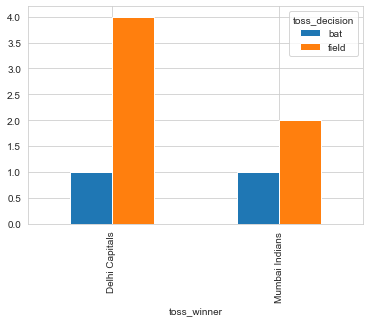

In [737]:
sns.set_style('whitegrid')
pd.crosstab(today_match.toss_winner, today_match.toss_decision).plot(kind='bar')

## The plot below suggests that Delhi Capitals will win the toss

Text(0.5, 1, 'Chances of Winning Toss')

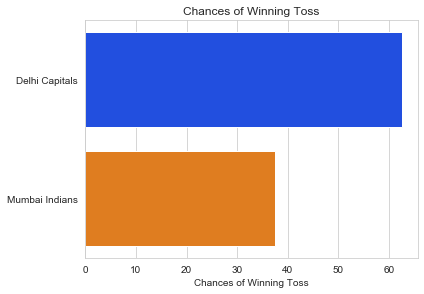

In [738]:
toss_wins = pd.DataFrame(today_match['toss_winner'].value_counts())
toss_wins['Chances of Winning Toss'] = toss_wins['toss_winner']*100/sum(toss_wins['toss_winner'])
sns.barplot(x=toss_wins['Chances of Winning Toss'], y=toss_wins.index, palette='bright')
plt.tight_layout()
plt.title('Chances of Winning Toss')

## The plot below suggests that Mumbai Indians will win the match

Text(0.5, 1.0, 'Percentage of Winning')

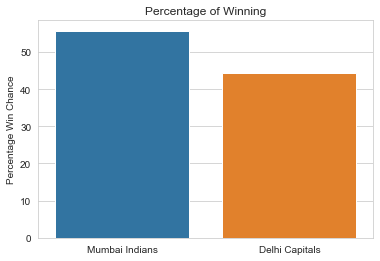

In [739]:
wins = pd.DataFrame(matches1['winner'].value_counts()[1:])
wins['Percentage Win Chance'] = (wins['winner']/sum(wins['winner']))*100
sns.barplot(wins.index, y=wins['Percentage Win Chance'])
plt.title('Percentage of Winning')

# 2. Analysis of Players and Stats

In [740]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [741]:
for col in ['batting_team', 'bowling_team']:
    delivery[col] = delivery[col].apply(team_correction)

In [742]:
rs = 'RG Sharma'
kr = 'K Rabada'
rs_matches = delivery[(delivery.batting_team==team_1) & (delivery.batsman==rs)]
rs_matches.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
276,2,1,Mumbai Indians,Rising Pune Supergiant,5,4,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
278,2,1,Mumbai Indians,Rising Pune Supergiant,5,6,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
279,2,1,Mumbai Indians,Rising Pune Supergiant,6,1,RG Sharma,JC Buttler,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
285,2,1,Mumbai Indians,Rising Pune Supergiant,7,1,RG Sharma,JC Buttler,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## Rohit Sharma Score Against DC is given below

Text(0.5, 1.0, 'Rohit Sharma score against all DC matches')

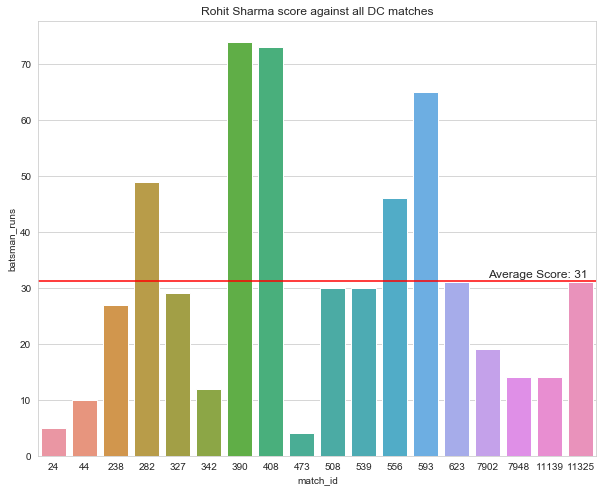

In [743]:
rs_vs_dc = rs_matches[rs_matches['bowling_team']==team_2].groupby('match_id').sum().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(x='match_id', y='batsman_runs', data=rs_vs_dc)
plt.axhline(y=np.mean(rs_vs_dc['batsman_runs']), color='red')
plt.text(x=14, y=np.mean(rs_vs_dc['batsman_runs'])+0.5, fontsize=12, s='Average Score: {}'.format(round(np.mean(rs_vs_dc['batsman_runs']))))
plt.title('Rohit Sharma score against all DC matches')

## Wides by MI and DC

In [744]:
md_wides_mi = round(np.median(delivery[delivery['bowling_team']==team_1].groupby('match_id').sum()['wide_runs']))
md_wides_dc = round(np.median(delivery[delivery['bowling_team']==team_2].groupby('match_id').sum()['wide_runs']))
print("Median Wides by DC:", md_wides_dc)
print("Median Wides by MI:", md_wides_mi)
print("Total Wides in todays match:", (md_wides_dc+md_wides_mi))

Median Wides by DC: 4.0
Median Wides by MI: 4.0
Total Wides in todays match: 8.0


## Wickets by K Rabada

In [745]:
kr_matches = delivery[delivery['bowler']==kr].fillna(0)
kr_matches['player_dismissed'] = kr_matches['player_dismissed'].apply(lambda x: 0 if x==0 else 1)
median_wc_kr = kr_matches.groupby('match_id').sum()['player_dismissed'].median()
print('Generally, K Rabada takes {} wickets in an IPL match'.format(median_wc_kr))

Generally, K Rabada takes 2.0 wickets in an IPL match


## The below plot further suggests that Rabada has taken 2 wickets generally against Mumbai Indians

Text(0.5, 1.0, 'Wickets taken by Rabada againt MI per match')

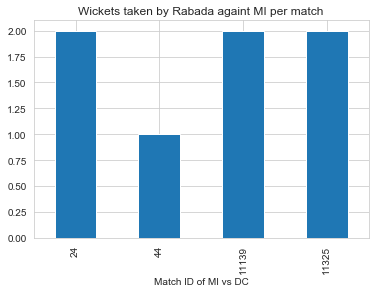

In [746]:
kr_vs_mi = delivery[(delivery['bowler']==kr) & (delivery['batting_team']==team_1)].fillna(0)
kr_vs_mi['player_dismissed'] = kr_vs_mi['player_dismissed'].apply(lambda x: 0 if x==0 else 1)
kr_vs_mi.groupby('match_id').sum()['player_dismissed'].plot(kind='bar')
plt.xlabel('Match ID of MI vs DC')
plt.title("Wickets taken by Rabada againt MI per match")

# Summary

- Data cleaned.
  
  
- Teams other other MI, DC were put in "Others" and new dataset created.


- Using toss_winner and toss_decision the chances of toss winning and toss decision was fetched out using bar graph.


- Using "winner" column probabilty of MI or DC winning was taken out. 


- Average runs of Rohit Sharma against DC was taken.


- Median value of No. of wides were taken for both teams and added.


- Rabada general number of wickets against MI and also against other IPL teams was considered.